In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline


In [3]:
df = pd.read_csv('Churn.csv')

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
print(f"The dataset contains {df.shape[0]} observations, from which we have {df.shape[1]} attributes")

The dataset contains 10000 observations, from which we have 14 attributes


In [6]:
print(f"Among their attributes, we observe {df.columns.tolist()}")

Among their attributes, we observe ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [7]:
df.nunique(axis=0)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.569400,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100110.239881,0.203700
std,2886.895680,71936.186123,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57545.696058,0.402769
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149400.107500,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,301348.880000,1.000000


In [9]:
print("Column          Missing values")
print("----------------------------123--")
df.isnull().sum()

Column          Missing values
----------------------------123--


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
print("Column               types")
print("--------------------------")
df.dtypes

Column               types
--------------------------


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
print("Column         Unique Values")
print("----------------------------")
df.nunique()

Column         Unique Values
----------------------------


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
print(f"Our target variable is Exited. We can observe that it has only two possible variables: {df['Exited'].unique().tolist()}")

Our target variable is Exited. We can observe that it has only two possible variables: [1, 0]


In [14]:
from numpy import mean
from numpy import std
# calculate summary statistics
data_mean, data_std = mean(df.EstimatedSalary), std(df.EstimatedSalary)
print('mean=%.3f stdv=%.3f' % (mean(df.EstimatedSalary), std(df.EstimatedSalary)))
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
print('lower=%.3f upper=%.3f' % (lower, upper))
# identify outliers
outliers = [x for x in df.EstimatedSalary if x < lower or x > upper]
print(outliers)

mean=100110.240 stdv=57542.819
lower=-72518.216 upper=272738.696
[301348.88]


In [15]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [16]:
new_names = {
    'CreditScore': 'credit_score',
    'Geography': 'country',
    'Gender': 'gender',
    'Age': 'age',
    'Tenure': 'tenure',
    'Balance': 'balance',
    'NumOfProducts': 'number_products',
    'HasCrCard': 'owns_credit_card',
    'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary',
    'Exited': 'exited'
}

In [17]:
df.rename(columns=new_names, inplace=True)

In [18]:
df.head()

,credit_score,country,gender,age,tenure,balance,number_products,owns_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,301348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
amount_retained = df[df['exited'] == 0]['exited'].count() / df.shape[0] * 100
amount_lost = df[df['exited'] == 1]['exited'].count() / df.shape[0] * 100

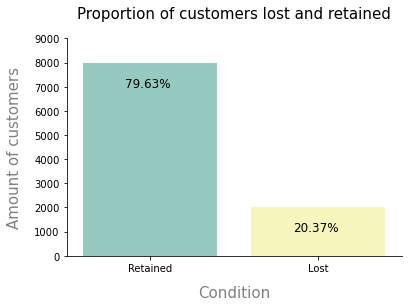

In [20]:
fig, ax = plt.subplots()
sns.countplot(x='exited', palette="Set3", data=df)
plt.xticks([0, 1], ['Retained', 'Lost'])
plt.xlabel('Condition', size=15, labelpad=12, color='grey')
plt.ylabel('Amount of customers', size=15, labelpad=12, color='grey')
plt.title("Proportion of customers lost and retained", size=15, pad=20)
plt.ylim(0, 9000)
plt.text(-0.15, 7000, f"{round(amount_retained, 2)}%", fontsize=12)
plt.text(0.85, 1000, f"{round(amount_lost, 2)}%", fontsize=12)
sns.despine()
plt.show()

In [21]:
categorical_labels = [['gender', 'country'], ['owns_credit_card', 'is_active_member']]
colors = [['Set1', 'Set2'], ['Set3', 'PuRd']]

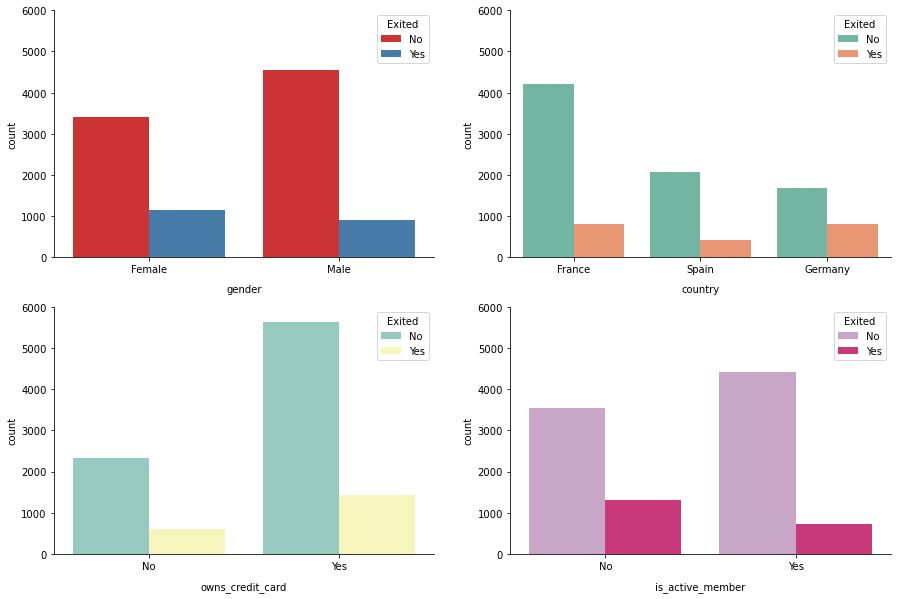

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
for i in range(2):
    for j in range(2):
        feature = categorical_labels[i][j]
        color = colors[i][j]
        ax1 = sns.countplot(x=feature, hue='exited', palette=color, data=df, ax=ax[i][j])
        ax1.set_xlabel(feature, labelpad=10)
        ax1.set_ylim(0, 6000)
        ax1.legend(title='Exited', labels= ['No', 'Yes'])
        if i == 1:
            ax1.set_xticklabels(['No', 'Yes'])
sns.despine()

In [24]:
female_churn = round(df[(df['exited'] == 1) & (df['gender'] == 'Female')]['exited'].count() / df[df['gender'] == 'Female']['exited'].count()*100, 2)
male_churn = round(df[(df['exited'] == 1) & (df['gender'] == 'Male')]['exited'].count() / df[df['gender'] == 'Male']['exited'].count() * 100, 2)

print(f"The percentage of female customers churning is {female_churn}% while the percetage of male customers churning is {male_churn}")

The percentage of female customers churning is 25.07% while the percetage of male customers churning is 16.46


In [25]:
active_churn = round(df[(df['exited'] == 1) & (df['is_active_member'] == 1)]['exited'].count() / df[df['is_active_member'] == 1]['exited'].count()*100, 2)
inactive_churn = round(df[(df['exited'] == 1) & (df['is_active_member'] == 0)]['exited'].count() / df[df['is_active_member'] == 0]['exited'].count() * 100, 2)

print(f"The percentage of active members churning is {active_churn}% while the percetage of inactive members churning is {inactive_churn}%")

The percentage of active members churning is 14.27% while the percetage of inactive members churning is 26.85%


In [26]:
credit_churn = round(df[(df['exited'] == 1) & (df['owns_credit_card'] == 1)]['exited'].count() / df[df['owns_credit_card'] == 1]['exited'].count()*100, 2)
no_credit_churn = round(df[(df['exited'] == 1) & (df['owns_credit_card'] == 0)]['exited'].count() / df[df['owns_credit_card'] == 0]['exited'].count() * 100, 2)

print(f"The percentage of custumers with credit card churning is {credit_churn}% while the percetage that do not have credit cards and")
print(f"churn is {no_credit_churn}%")

The percentage of custumers with credit card churning is 20.18% while the percetage that do not have credit cards and
churn is 20.81%


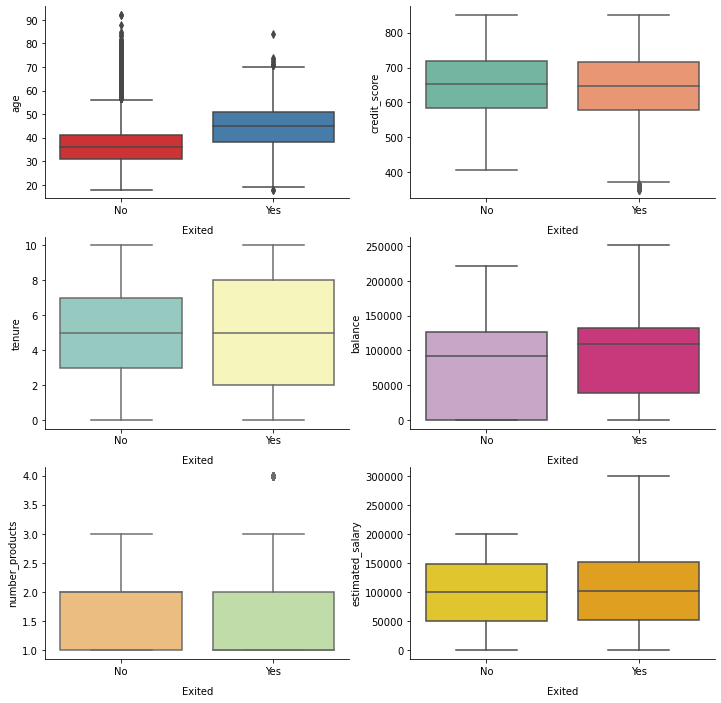

In [28]:
numerical_labels = [['age', 'credit_score'], 
                    ['tenure', 'balance'],
                   ['number_products', 'estimated_salary']]
num_colors = [['Set1', 'Set2'], 
              ['Set3', 'PuRd'],
              ['Spectral', 'Wistia']]
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
for i in range(3):
    for j in range(2):
        feature = numerical_labels[i][j]
        color = num_colors[i][j]
        ax1 = sns.boxplot(x='exited', y=feature, palette=color, data=df, ax=ax[i][j])
        ax1.set_xlabel('Exited', labelpad=10)
        ax1.set_xticklabels(['No', 'Yes'])
sns.despine()


In [29]:
pd.DataFrame(df.groupby('exited')['age'].describe())

,count,mean,std,min,25%,50%,75%,max
exited,,,,,,,,
0,7963.0,37.408389,10.125363,18.0,31.0,36.0,41.0,92.0
1,2037.0,44.837997,9.761562,18.0,38.0,45.0,51.0,84.0


In [30]:
df.head()

,credit_score,country,gender,age,tenure,balance,number_products,owns_credit_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,301348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

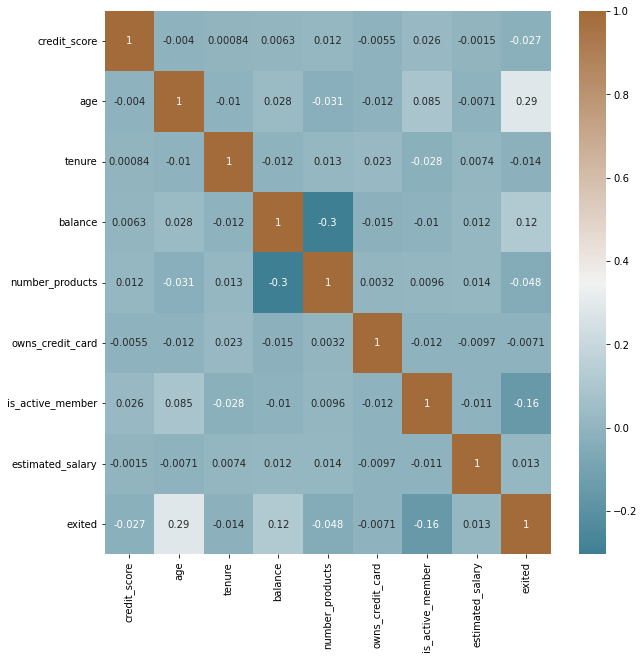

In [31]:
corr = df.corr()# plot the heatmap
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 40, as_cmap=True))

<AxesSubplot:xlabel='credit_score', ylabel='balance'>

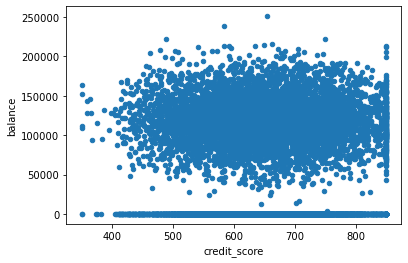

In [32]:
df.plot(kind='scatter', x='credit_score', y='balance')

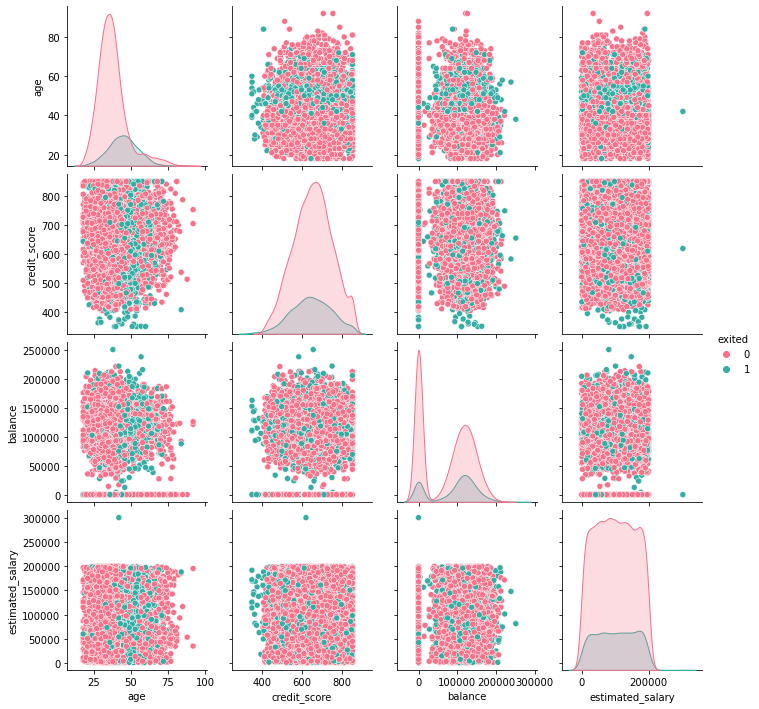

In [33]:
sns.pairplot(df, vars=['age', 'credit_score', 'balance', 'estimated_salary'], 
             hue="exited", palette='husl')
sns.despine()